In [10]:
path = 'c:\\pytest\\'
model_name = 'transformer'
DATA_OUT_PATH = path + 'data\\'


In [11]:
import pandas as pd
data = pd.read_csv(path+'chatdata_small.csv', names=['Q', 'A', "label"], sep=',', header=0, encoding='cp949')
print('data length:', len(data))
print('data sample:', data.head())


data length: 19
data sample:                  Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


In [12]:
inputs, outputs = list(data['Q']), list(data['A'])
print(inputs)
print(outputs)


['12시 땡!', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네', 'SD카드 망가졌어', 'SD카드 안돼', 'SNS 맞팔 왜 안하지ㅠㅠ', 'SNS 시간낭비인 거 아는데 매일 하는 중', 'SNS 시간낭비인데 자꾸 보게됨', 'SNS보면 나만 빼고 다 행복해보여', '가끔 궁금해', '가끔 뭐하는지 궁금해', '가끔은 혼자인게 좋다', '가난한 자의 설움', '가만 있어도 땀난다', '가상화폐 쫄딱 망함', '가스불 켜고 나갔어', '가스불 켜놓고 나온거 같아']
['하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.', '다시 새로 사는 게 마음 편해요.', '다시 새로 사는 게 마음 편해요.', '잘 모르고 있을 수도 있어요.', '시간을 정하고 해보세요.', '시간을 정하고 해보세요.', '자랑하는 자리니까요.', '그 사람도 그럴 거예요.', '그 사람도 그럴 거예요.', '혼자를 즐기세요.', '돈은 다시 들어올 거예요.', '땀을 식혀주세요.', '어서 잊고 새출발 하세요.', '빨리 집에 돌아가서 끄고 나오세요.', '빨리 집에 돌아가서 끄고 나오세요.']


In [33]:
outputs_input = data.A.apply(lambda x: '<SOS> '+x+' <EOS>')
outputs_target = data.A.apply(lambda x: x+' <EOS>')
print('\noutputs_input:\n', outputs_input.sample(5))
print("\noutputs_target\n:", outputs_target.sample(5))



outputs_input:
 12          <SOS> 그 사람도 그럴 거예요. <EOS>
18    <SOS> 빨리 집에 돌아가서 끄고 나오세요. <EOS>
8           <SOS> 시간을 정하고 해보세요. <EOS>
4              <SOS> 눈살이 찌푸려지죠. <EOS>
11          <SOS> 그 사람도 그럴 거예요. <EOS>
Name: A, dtype: object

outputs_target
: 18    빨리 집에 돌아가서 끄고 나오세요. <EOS>
9           시간을 정하고 해보세요. <EOS>
1               위로해 드립니다. <EOS>
2             여행은 언제나 좋죠. <EOS>
3             여행은 언제나 좋죠. <EOS>
Name: A, dtype: object


In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
inputs_series = pd.Series(inputs)
inputs_outputs = pd.concat([inputs_series, outputs_input], axis=0)
tokenizer = Tokenizer(num_words=None, char_level=False, lower=False)
tokenizer.fit_on_texts(inputs_outputs)
word_index = tokenizer.word_index
print('\n전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
print('word_index:', word_index)
print('vocab_size:', len(word_index))



전체에서 100개의 고유한 토큰을 찾았습니다.
word_index: {'SOS': 1, 'EOS': 2, 'SNS': 3, '다시': 4, '거예요': 5, '3박4일': 6, '놀러가고': 7, '싶다': 8, 'SD카드': 9, '가끔': 10, '궁금해': 11, '가스불': 12, '여행은': 13, '언제나': 14, '좋죠': 15, '새로': 16, '사는': 17, '게': 18, '마음': 19, '편해요': 20, '시간을': 21, '정하고': 22, '해보세요': 23, '그': 24, '사람도': 25, '그럴': 26, '빨리': 27, '집에': 28, '돌아가서': 29, '끄고': 30, '나오세요': 31, '12시': 32, '땡': 33, '1지망': 34, '학교': 35, '떨어졌어': 36, '정도': 37, 'PPL': 38, '심하네': 39, '망가졌어': 40, '안돼': 41, '맞팔': 42, '왜': 43, '안하지ㅠㅠ': 44, '시간낭비인': 45, '거': 46, '아는데': 47, '매일': 48, '하는': 49, '중': 50, '시간낭비인데': 51, '자꾸': 52, '보게됨': 53, 'SNS보면': 54, '나만': 55, '빼고': 56, '다': 57, '행복해보여': 58, '뭐하는지': 59, '가끔은': 60, '혼자인게': 61, '좋다': 62, '가난한': 63, '자의': 64, '설움': 65, '가만': 66, '있어도': 67, '땀난다': 68, '가상화폐': 69, '쫄딱': 70, '망함': 71, '켜고': 72, '나갔어': 73, '켜놓고': 74, '나온거': 75, '같아': 76, '하루가': 77, '또': 78, '가네요': 79, '위로해': 80, '드립니다': 81, '눈살이': 82, '찌푸려지죠': 83, '잘': 84, '모르고': 85, '있을': 86, '수도': 87, '있어요': 88, '자랑하는': 89, '자리니까요': 90,

In [35]:
import os
import pickle
if os.path.exists(DATA_OUT_PATH+model_name):
    print("{}--Folder already exists\n".format(DATA_OUT_PATH))
else:
    os.makedirs(DATA_OUT_PATH+model_name, exist_ok=True)
    print("{}--Folder create complete\n".format(DATA_OUT_PATH))
with open(DATA_OUT_PATH+model_name+"/transformer.pickle", "wb") as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)


c:\pytest\data\--Folder already exists



In [36]:
encoder_input = tokenizer.texts_to_sequences(list(inputs))
print('\nResult of encoder_input sequencing:')
print(inputs[0], encoder_input[0])
print(inputs[1], encoder_input[1])
print(inputs[2], encoder_input[2])



Result of encoder_input sequencing:
12시 땡! [32, 33]
1지망 학교 떨어졌어 [34, 35, 36]
3박4일 놀러가고 싶다 [6, 7, 8]


In [37]:
decoder_input = tokenizer.texts_to_sequences(list(outputs_input))
decoder_target = tokenizer.texts_to_sequences(list(outputs_target))
print('\nResult of decoder_input sequencing:')
print(outputs_input[0], decoder_input[0])
print(outputs_input[1], decoder_input[1])
print(outputs_input[2], decoder_input[2])

print('\nResult of decoder_target sequencing:')
print(outputs_target[0], decoder_target[0])
print(outputs_target[1], decoder_target[1])
print(outputs_target[2], decoder_target[2])



Result of decoder_input sequencing:
<SOS> 하루가 또 가네요. <EOS> [1, 77, 78, 79, 2]
<SOS> 위로해 드립니다. <EOS> [1, 80, 81, 2]
<SOS> 여행은 언제나 좋죠. <EOS> [1, 13, 14, 15, 2]

Result of decoder_target sequencing:
하루가 또 가네요. <EOS> [77, 78, 79, 2]
위로해 드립니다. <EOS> [80, 81, 2]
여행은 언제나 좋죠. <EOS> [13, 14, 15, 2]


In [40]:
sentence_max_length = inputs_outputs.apply(lambda x: len(x.split())).max()
print('sentence max length:', sentence_max_length)


sentence max length: 8


In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input_pad = pad_sequences(encoder_input, maxlen=sentence_max_length, padding='post')
decoder_input_pad = pad_sequences(decoder_input, maxlen=sentence_max_length, padding='post')
decoder_target_pad = pad_sequences(decoder_target, maxlen=sentence_max_length, padding='post')


In [42]:
print('\nencoder_input_padshape:', encoder_input_pad.shape)
print("inputs:", inputs[1])
print("encoder_input:", encoder_input[1])
print("encoder_input_pad:", encoder_input_pad[1])
print('\ndecoder_input_padshape:', decoder_input_pad.shape)
print("outputs_input:", outputs_input[1])
print("decoder_input:", decoder_input[1])
print("decoder_input_pad:", decoder_input_pad[1])
print('\ndecoder_target_padshape:', decoder_target_pad.shape)
print("outputs_target:", outputs_target[1])
print("decoder_target:", decoder_target[1])
print("decoder_target_pad:", decoder_target_pad[1])



encoder_input_padshape: (19, 8)
inputs: 1지망 학교 떨어졌어
encoder_input: [34, 35, 36]
encoder_input_pad: [34 35 36  0  0  0  0  0]

decoder_input_padshape: (19, 8)
outputs_input: <SOS> 위로해 드립니다. <EOS>
decoder_input: [1, 80, 81, 2]
decoder_input_pad: [ 1 80 81  2  0  0  0  0]

decoder_target_padshape: (19, 8)
outputs_target: 위로해 드립니다. <EOS>
decoder_target: [80, 81, 2]
decoder_target_pad: [80 81  2  0  0  0  0  0]


In [43]:
import tensorflow as tf
import numpy as np
import pandas as pd
import enum
import os
import re
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [44]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)


In [45]:
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2

index_inputs = encoder_input_pad
index_outputs = decoder_input_pad
index_targets = decoder_target_pad

char2idx_dict = word_index
idx2char_dict = {y: x for x, y in word_index.items()}


In [46]:
char2idx_dict['<PAD>'] = 0
char2idx_dict['<SOS>'] = char2idx_dict['SOS']
del char2idx_dict['SOS']
char2idx_dict['<END>'] = char2idx_dict['EOS']
del char2idx_dict['EOS']
idx2char_dict[0] = '<PAD>'
idx2char_dict[1] = '<SOS>'
idx2char_dict[2] = '<END>'


In [47]:
prepro_configs = dict({'char2idx': char2idx_dict, 'idx2char': idx2char_dict, 'vocab_size': len(
    word_index), 'pad_symbol': '<PAD>', 'std_symbol': '<SOS>', 'end_symbol': '<END>'})
print(prepro_configs)


{'char2idx': {'SNS': 3, '다시': 4, '거예요': 5, '3박4일': 6, '놀러가고': 7, '싶다': 8, 'SD카드': 9, '가끔': 10, '궁금해': 11, '가스불': 12, '여행은': 13, '언제나': 14, '좋죠': 15, '새로': 16, '사는': 17, '게': 18, '마음': 19, '편해요': 20, '시간을': 21, '정하고': 22, '해보세요': 23, '그': 24, '사람도': 25, '그럴': 26, '빨리': 27, '집에': 28, '돌아가서': 29, '끄고': 30, '나오세요': 31, '12시': 32, '땡': 33, '1지망': 34, '학교': 35, '떨어졌어': 36, '정도': 37, 'PPL': 38, '심하네': 39, '망가졌어': 40, '안돼': 41, '맞팔': 42, '왜': 43, '안하지ㅠㅠ': 44, '시간낭비인': 45, '거': 46, '아는데': 47, '매일': 48, '하는': 49, '중': 50, '시간낭비인데': 51, '자꾸': 52, '보게됨': 53, 'SNS보면': 54, '나만': 55, '빼고': 56, '다': 57, '행복해보여': 58, '뭐하는지': 59, '가끔은': 60, '혼자인게': 61, '좋다': 62, '가난한': 63, '자의': 64, '설움': 65, '가만': 66, '있어도': 67, '땀난다': 68, '가상화폐': 69, '쫄딱': 70, '망함': 71, '켜고': 72, '나갔어': 73, '켜놓고': 74, '나온거': 75, '같아': 76, '하루가': 77, '또': 78, '가네요': 79, '위로해': 80, '드립니다': 81, '눈살이': 82, '찌푸려지죠': 83, '잘': 84, '모르고': 85, '있을': 86, '수도': 87, '있어요': 88, '자랑하는': 89, '자리니까요': 90, '혼자를': 91, '즐기세요': 92, '돈은': 93, '들어올': 94, '

In [49]:
char2idx = prepro_configs['char2idx']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCHS = 30
VALID_SPLIT = 0.1


In [51]:
kargs = {'model_name': model_name, 'num_layers': 2, 'd_model': 512, 'num_heads': 8, 'dff': 2048, 'input_vocab_size': vocab_size,
         'target_vocab_size': vocab_size, 'maximum_position_encoding': MAX_SEQUENCE, 'end_token_idx': char2idx[end_index], 'rate': 0.1}


In [52]:
def create_padding_mask(seq):
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]


In [53]:
def create_look_ahead_mask(size):
    mask = 1-tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask


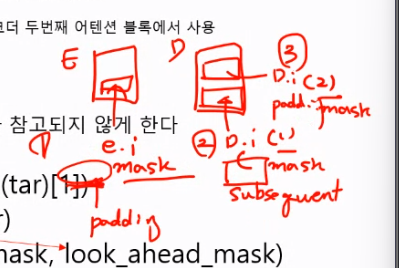

In [57]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return enc_padding_mask, combined_mask, dec_padding_mask


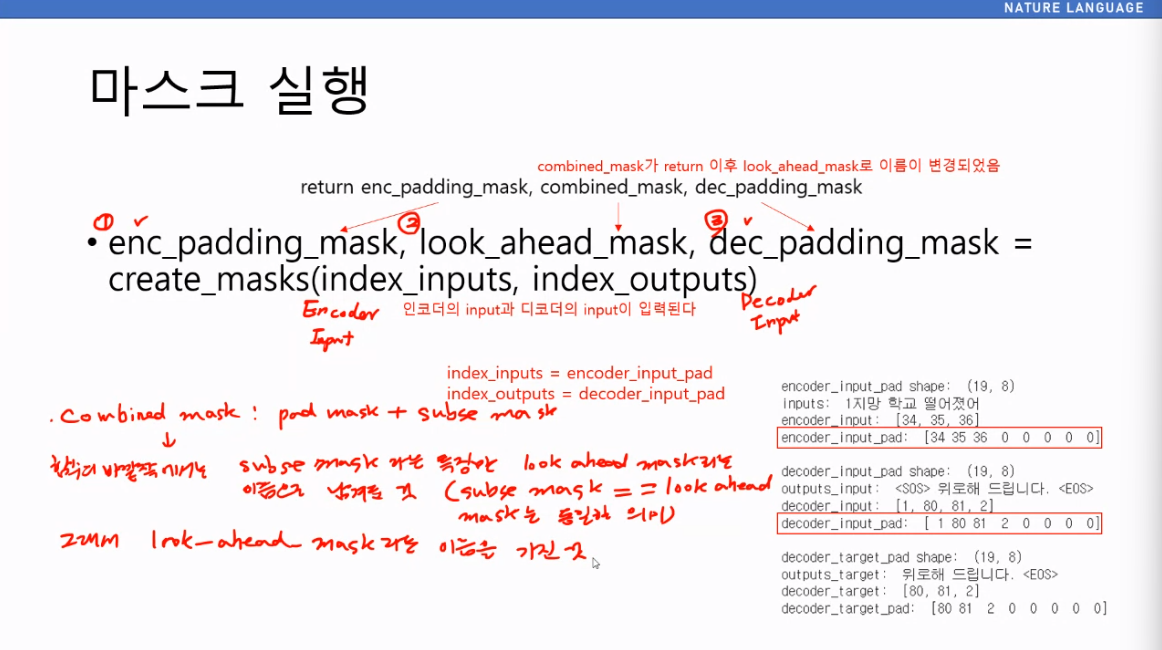

In [58]:
enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(index_inputs, index_outputs)
